In [5]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

In [ ]:
# plt.fill_between()

# Adversarial Training Loss

In [19]:
path = '/Users/apple/Documents/P4_Graph/merge_sourcecode/bipartite-graph-learning/ABCGraph-MLP-loss.txt'

In [29]:
def readMLPFile(path):
    with open(path, 'r') as file:
        data = file.readlines()
    data = list(map(lambda s:s.strip(), data))
    loss = defaultdict(list)
    step = 1
    for l in data:
        if l.startswith('###'):
            step += 1
            continue
        loss[step].append(float(l))
    return loss

In [30]:
loss = readMLPFile(path)

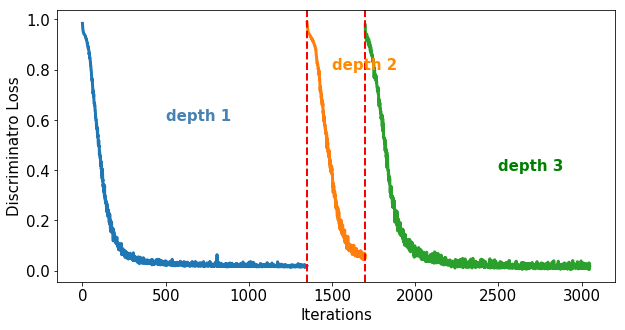

In [44]:
plt.figure(figsize=(10, 5))
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

length1 = len(loss[1])
length2 = len(loss[2])
length3 = len(loss[3])

plt.plot(loss[1], linewidth=3)
plt.plot([i for i in range(length1, length1 + length2)], loss[2], linewidth=3)
plt.plot([i for i in range(length1 + length2, length1 + length2 + length3)], loss[3], linewidth=3)
# plt.xticks(range(6), [100*i for i in range(0,11,2)])
plt.xlabel('Iterations', fontsize=15)
plt.ylabel('Discriminatro Loss', fontsize=15)
# plt.legend(['depth 1', 'depth 2', 'depth 3'], fontsize=15)
# plt.title('Pubmed', fontsize=20)
plt.annotate('depth 1', xy=(500, 0.6), fontsize=15, color='steelblue', fontweight='bold')
plt.annotate('depth 2', xy=(1500, 0.8), fontsize=15, color='darkorange', fontweight='bold')
plt.annotate('depth 3', xy=(2500, 0.4), fontsize=15, color='g', fontweight='bold')
plt.axvline(length1, linestyle='--', linewidth=2, color='r')
plt.axvline(length1 + length2, linestyle='--', linewidth=2, color='r')

plt.savefig('/Users/apple/Documents/P4_Graph/Figure/mlp_loss.eps', format='eps')
plt.show()

In [9]:
def readFile(path):
    with open(path, 'r') as file:
        data = file.readlines()
    data = list(map(lambda s:s.strip(), data))
    dis_loss = defaultdict(list)
    gen_loss = defaultdict(list)
    step = 1
    for loss in data:
        if loss.startswith('###'):
            step += 1
            continue
        loss = loss.split(' ')
        dis_loss[step].append(float(loss[0]))
        gen_loss[step].append(float(loss[1]))
    return dis_loss, gen_loss

In [10]:
dis_loss, gen_loss = readFile(path)

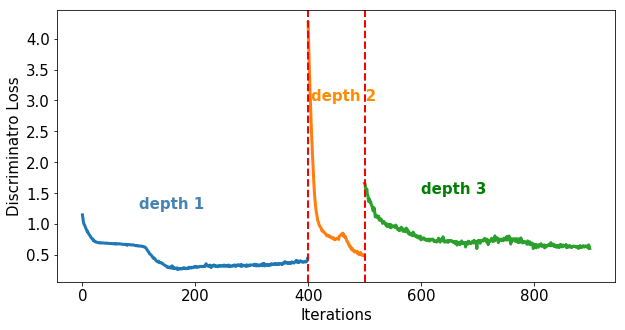

In [15]:
plt.figure(figsize=(10, 5))
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

length1 = len(dis_loss[1])
length2 = len(dis_loss[2])
length3 = len(dis_loss[3])

plt.plot(dis_loss[1], linewidth=3)
plt.plot([i for i in range(length1, length1 + length2)], dis_loss[2], linewidth=3)
plt.plot([i for i in range(length1 + length2, length1 + length2 + length3)], dis_loss[3], linewidth=3)
# plt.xticks(range(6), [100*i for i in range(0,11,2)])
plt.xlabel('Iterations', fontsize=15)
plt.ylabel('Discriminatro Loss', fontsize=15)
# plt.legend(['depth 1', 'depth 2', 'depth 3'], fontsize=15)
# plt.title('Pubmed', fontsize=20)
plt.annotate('depth 1', xy=(100, 1.25), fontsize=15, color='steelblue', fontweight='bold')
plt.annotate('depth 2', xy=(405, 3.0), fontsize=15, color='darkorange', fontweight='bold')
plt.annotate('depth 3', xy=(600, 1.5), fontsize=15, color='g', fontweight='bold')
plt.axvline(length1, linestyle='--', linewidth=2, color='r')
plt.axvline(length1 + length2, linestyle='--', linewidth=2, color='r')

plt.savefig('/Users/apple/Documents/P4_Graph/Figure/discriminator_loss.eps', format='eps')
plt.show()

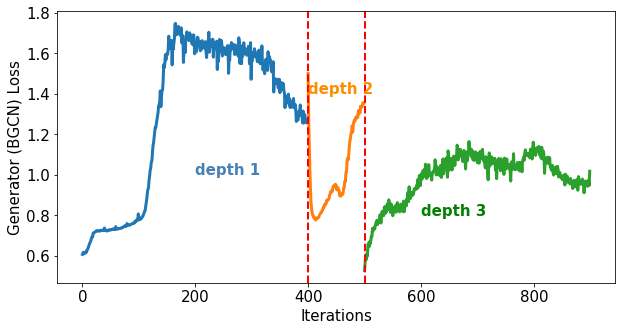

In [18]:
plt.figure(figsize=(10, 5))
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

length1 = len(gen_loss[1])
length2 = len(gen_loss[2])
length3 = len(gen_loss[3])

plt.plot(gen_loss[1], linewidth=3)
plt.plot([i for i in range(length1, length1 + length2)], gen_loss[2], linewidth=3)
plt.plot([i for i in range(length1 + length2, length1 + length2 + length3)], gen_loss[3], linewidth=3)
# plt.xticks(range(6), [100*i for i in range(0,11,2)])
plt.xlabel('Iterations', fontsize=15)
plt.ylabel('Generator (BGCN) Loss', fontsize=15)
# plt.legend(['depth 1', 'depth 2', 'depth 3'], fontsize=15)
# plt.title('', fontsize=20)
# plt.grid(True)
plt.annotate('depth 1', xy=(200, 1.00), fontsize=15, color='steelblue', fontweight='bold')
plt.annotate('depth 2', xy=(400, 1.4), fontsize=15, color='darkorange', fontweight='bold')
plt.annotate('depth 3', xy=(600, 0.8), fontsize=15, color='g', fontweight='bold')
plt.axvline(length1, linestyle='--', linewidth=2, color='r')
plt.axvline(length1 + length2, linestyle='--', linewidth=2, color='r')

plt.savefig('/Users/apple/Documents/P4_Graph/Figure/generator_loss.eps', format='eps')
plt.show()

# Memory

In [191]:
path1 = '/Users/apple/Documents/P4_Graph/merge_sourcecode/bipartite-graph-learning/test/paper_exp/ABCGraph-mem.log'
path2 = '/Users/apple/Documents/P4_Graph/merge_sourcecode/bipartite-graph-learning/test/paper_exp/GraphSAGE-mem.log'

In [192]:
def loadMemory(path):
    with open(path, 'r') as file:
        data = file.readlines()
    data = list(map(lambda x: float(x.split(' ')[-1])/(1024 * 1024), data))
    return data

In [193]:
abcgraph_memory = loadMemory(path1)
graphsage_memory = loadMemory(path2)

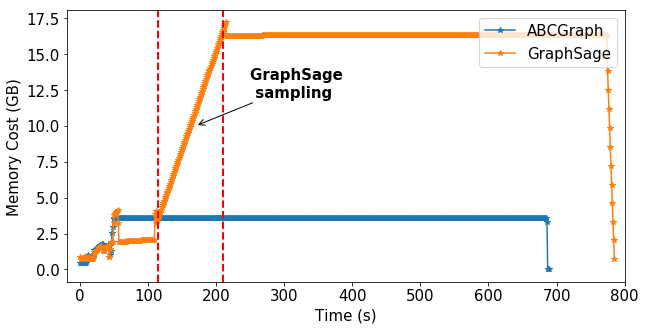

In [313]:
plt.figure(figsize=(10, 5))
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.xlim([-20, 800])

length = len(abcgraph_memory)

abcgraph, = plt.plot(abcgraph_memory, marker='*')
graphsage, = plt.plot(graphsage_memory[:800], marker='*')
# plt.xticks(range(6), [100*i for i in range(0,11,2)])
plt.xlabel('Time (s)', fontsize=15)
plt.ylabel('Memory Cost (GB)', fontsize=15)
plt.legend([abcgraph, graphsage], ['ABCGraph', 'GraphSage'], fontsize=15, loc=1)
plt.annotate('GraphSage \n sampling', xy=(170, 10.0), xytext=(250, 12.0), fontsize=15, color='black', fontweight='bold',
             arrowprops=dict(arrowstyle="->"))
plt.axvline(115, linestyle='--', linewidth=2, color='r')
plt.axvline(210, linestyle='--', linewidth=2, color='r')
# plt.title('', fontsize=20)
# plt.grid(True)

plt.savefig('/Users/apple/Documents/P4_Graph/Figure/memory.eps', format='eps')
plt.show()

# Training Time Comparison

In [236]:
Node2Vec = (12, 12)
# VGAE = (0, 0 )
GraphSage = (150, 120)
ABCGraph_MLP = (13.5, 12)
ABCGraph_Adv = (11, 12)
ABCGraph = (23, 21)

In [270]:
# GraphSage, Node2Vec, ABCGraph_MLP, ABCGraph_Adv
cpu = [12, 23, 30]
gpu = [12, 21, 30]

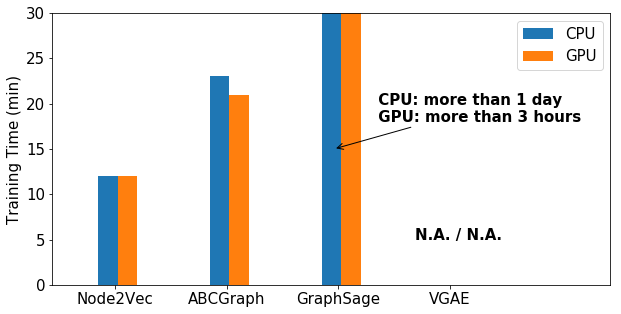

In [306]:
plt.figure(figsize=(10, 5))
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

index = np.array([0.2, 0.6, 1.0])
# index = np.arange(2) + 0.3
bar_width = 0.07
plt.bar(index, cpu, bar_width)
plt.bar(index + 0.07, gpu, bar_width)
plt.legend(['CPU', 'GPU'], fontsize=15)
# plt.text(1.2, 15, 'GraphSage CPU: > 1 day', fontsize=15)
# plt.text(1.2, 13, 'GraphSage GPU: 208 min', fontsize=15)
plt.text(1.3, 5, 'N.A. / N.A.', fontsize=15, fontweight='bold')

plt.annotate(' CPU: more than 1 day \n GPU: more than 3 hours', xy=(1.01, 15), xytext=(1.15, 18), fontsize=15, color='black', fontweight='bold',
             arrowprops=dict(arrowstyle="->"))

plt.xlim([0, 2])
plt.ylim([0, 30])
plt.xticks(np.array([0.2, 0.6, 1.0, 1.4]) + 0.025, ['Node2Vec', 'ABCGraph', 'GraphSage', 'VGAE'])
plt.ylabel('Training Time (min)', fontsize=15)

plt.savefig('/Users/apple/Documents/P4_Graph/Figure/training_time.eps', format='eps')
plt.show()

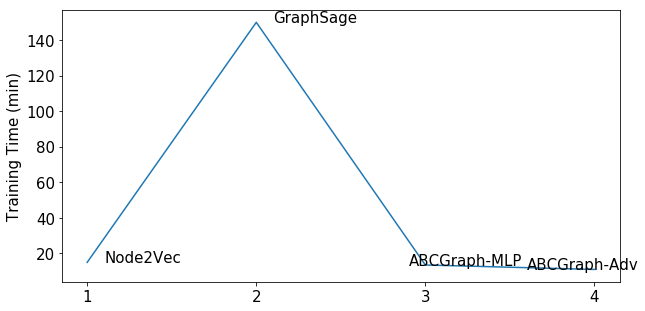

In [119]:
plt.figure(figsize=(10, 5))
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.plot(cpu)
plt.xticks(range(4), [1, 2, 3, 4])
# plt.xlabel('', fontsize=15)
plt.ylabel('Training Time (min)', fontsize=15)
plt.annotate('Node2Vec', xy=[0.1, cpu[0]], fontsize=15)
plt.annotate('GraphSage', xy=[1.1, cpu[1]], fontsize=15)
plt.annotate('ABCGraph-MLP', xy=[1.9, cpu[2]], fontsize=15)
plt.annotate('ABCGraph-Adv', xy=[2.6, cpu[3]], fontsize=15)
# plt.legend([], fontsize=15)
# plt.title('', fontsize=20)
# plt.grid(True)

# plt.savefig('/Users/apple/Documents/P4_Graph/Figure/generator_loss.eps', format='eps')
plt.show()

# Plotting Model

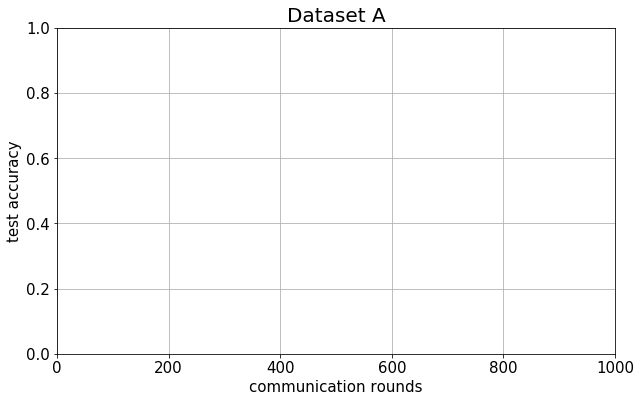

In [5]:
plt.figure(figsize=(10, 6))
x = np.linspace(0, 5, 1000)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.xticks(range(6), [100*i for i in range(0,11,2)])
plt.xlabel('communication rounds', fontsize=15)
plt.ylabel('test accuracy', fontsize=15)
plt.title('Dataset A', fontsize=20)
plt.grid(True)

plt.show()

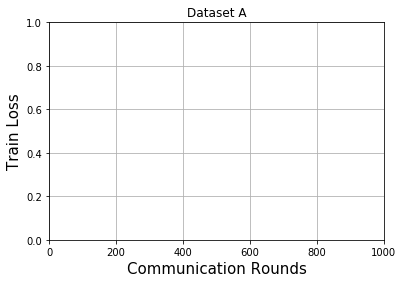

In [17]:
x = np.linspace(0, 5, 1000)

plt.xticks(range(6), [100*i for i in range(0,11,2)])

plt.xlabel('Communication Rounds', fontsize=15)
plt.ylabel('Train Loss', fontsize=15)

plt.title('Dataset A')
plt.grid(True)

plt.show()

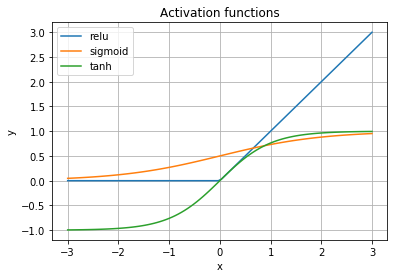

In [5]:
x = np.linspace(-3, 3, 100)

plt.plot(x, np.maximum(0, x), label='relu')
plt.plot(x, 1/(1 + np.exp(-x)), label='sigmoid')
plt.plot(x, (1 - np.exp(-2 * x))/(1 + np.exp(-2 * x)), label='tanh')

plt.xlabel('x')
plt.ylabel('y')

plt.title("Activation functions")
plt.legend()
plt.grid(True)

plt.show()